## Deliverable 2: Data Cleaning and Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np # algebra / computations
import matplotlib.pyplot as plt # plotting
import seaborn as sns # fancier plotting
%matplotlib inline

In [3]:
data = pd.read_csv('yellow_tripdata_2021-01.csv')
data['ID'] = data.index.values

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#looking through the data
data.head().T

,0,1,2,3,4
VendorID,1,1,1,1,2
tpep_pickup_datetime,2021-01-01 00:30:10,2021-01-01 00:51:20,2021-01-01 00:43:30,2021-01-01 00:15:48,2021-01-01 00:31:49
tpep_dropoff_datetime,2021-01-01 00:36:12,2021-01-01 00:52:19,2021-01-01 01:11:06,2021-01-01 00:31:01,2021-01-01 00:48:21
passenger_count,1,1,1,0,1
trip_distance,2.1,0.2,14.7,10.6,4.94
RatecodeID,1,1,1,1,1
store_and_fwd_flag,N,N,N,N,N
PULocationID,142,238,132,138,68
DOLocationID,43,151,165,132,33
payment_type,2,2,1,1,1


In [5]:
#describing the statistical information of the data
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ID
count,1.271413e+06,1.271413e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06
mean,1.676925e+00,1.411508e+00,4.631982e+00,1.035081e+00,1.652472e+02,1.614956e+02,1.280521e+00,1.209662e+01,9.705085e-01,4.930411e-01,1.918099e+00,2.477432e-01,2.969412e-01,1.747439e+01,2.116098e+00,6.848820e+05
std,4.676513e-01,1.059833e+00,3.939042e+02,5.994840e-01,6.783849e+01,7.210800e+01,4.916921e-01,1.291338e+01,1.231256e+00,7.632070e-02,2.597153e+00,1.672755e+00,4.222174e-02,1.469343e+01,9.287277e-01,3.954172e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.240000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00,3.424410e+05
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.380000e+01,2.500000e+00,6.848820e+05
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.750000e+00,0.000000e+00,3.000000e-01,1.912000e+01,2.500000e+00,1.027323e+06
max,2.000000e+00,8.000000e+00,2.631633e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,8.250000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00,1.369764e+06


In [6]:
#getting info of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369765 entries, 0 to 1369764
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1271413 non-null  float64
 1   tpep_pickup_datetime   1369765 non-null  object 
 2   tpep_dropoff_datetime  1369765 non-null  object 
 3   passenger_count        1271413 non-null  float64
 4   trip_distance          1369765 non-null  float64
 5   RatecodeID             1271413 non-null  float64
 6   store_and_fwd_flag     1271413 non-null  object 
 7   PULocationID           1369765 non-null  int64  
 8   DOLocationID           1369765 non-null  int64  
 9   payment_type           1271413 non-null  float64
 10  fare_amount            1369765 non-null  float64
 11  extra                  1369765 non-null  float64
 12  mta_tax                1369765 non-null  float64
 13  tip_amount             1369765 non-null  float64
 14  tolls_amount      

In [7]:
#checking number of rows and columns
data.shape

(1369765, 19)

In [8]:
data.isnull().sum()

VendorID                 98352
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          98352
trip_distance                0
RatecodeID               98352
store_and_fwd_flag       98352
PULocationID                 0
DOLocationID                 0
payment_type             98352
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
ID                           0
dtype: int64

In [9]:
#getting correlation matrix
corr = data.corr()
corr

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ID
VendorID,1.000000,0.193256,0.001345,0.000605,-0.006004,0.003585,-0.017666,-0.007499,-0.857561,-0.040121,0.018130,-0.003404,-0.049515,-0.003667,0.011083,-0.006284
passenger_count,0.193256,1.000000,0.000138,-0.005506,-0.000599,0.000415,-0.002380,0.005423,-0.162697,0.006210,0.005292,0.003053,0.004233,0.006628,0.006557,-0.007833
trip_distance,0.001345,0.000138,1.000000,0.009999,-0.003549,-0.002817,0.001498,0.013399,0.000665,0.000321,0.002810,0.007193,0.000518,0.012618,-0.012649,0.007965
RatecodeID,0.000605,-0.005506,0.009999,1.000000,-0.012099,0.009349,0.008374,0.176764,-0.023379,-0.146838,0.075598,0.098126,-0.027554,0.170925,-0.091939,-0.009099
PULocationID,-0.006004,-0.000599,-0.003549,-0.012099,1.000000,0.107879,-0.048887,-0.086673,0.023175,0.007307,-0.012597,-0.054259,0.002685,-0.075704,0.175372,-0.012600
DOLocationID,0.003585,0.000415,-0.002817,0.009349,0.107879,1.000000,-0.055262,-0.096730,0.026731,0.001719,0.006445,-0.036585,-0.001156,-0.077942,0.183707,-0.033833
payment_type,-0.017666,-0.002380,0.001498,0.008374,-0.048887,-0.055262,1.000000,-0.036481,-0.029157,-0.287189,-0.416888,-0.005935,-0.307486,-0.128233,-0.241264,-0.028059
fare_amount,-0.007499,0.005423,0.013399,0.176764,-0.086673,-0.096730,-0.036481,1.000000,-0.020381,0.045759,0.400434,0.355875,0.121799,0.976886,-0.303553,0.110888
extra,-0.857561,-0.162697,0.000665,-0.023379,0.023175,0.026731,-0.029157,-0.020381,1.000000,0.081143,-0.007599,-0.003167,0.072465,0.007940,0.157449,0.004754
mta_tax,-0.040121,0.006210,0.000321,-0.146838,0.007307,0.001719,-0.287189,0.045759,0.081143,1.000000,0.024595,-0.032170,0.910743,0.072839,0.337915,0.008260


In [10]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data['hh_pickup'] = data.tpep_pickup_datetime.dt.hour.astype(np.uint8)
data['hh_dropoff'] = data.tpep_dropoff_datetime.dt.hour.astype(np.uint8)

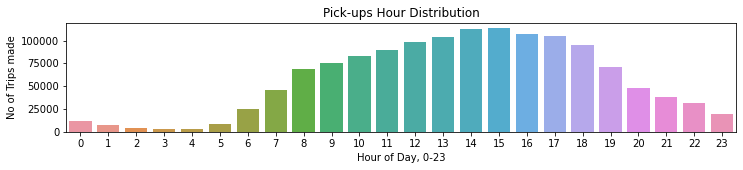

In [11]:
# pickup time distribution, hour-of-day
plt.figure(figsize=(12,2))

graph_data = data.groupby('hh_pickup').aggregate({'ID':'count'}).reset_index()
sns.barplot(x='hh_pickup', y='ID', data=graph_data)

plt.title('Pick-ups Hour Distribution')
plt.xlabel('Hour of Day, 0-23')
plt.ylabel('No of Trips made')
pass

In [12]:
# dow names for plot mapping
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# day of week
data['dow_pickup'] = data.tpep_pickup_datetime.dt.weekday.astype(np.uint8)
data['dow_dropoff'] = data.tpep_dropoff_datetime.dt.weekday.astype(np.uint8)

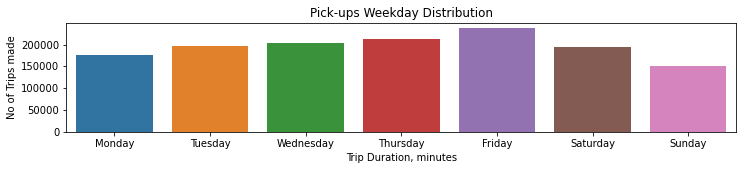

In [13]:
# pickup distribution, by weekday
plt.figure(figsize=(12,2))

graph_data = data.groupby('dow_pickup').aggregate({'ID':'count'}).reset_index()
sns.barplot(x='dow_pickup', y='ID', data=graph_data)

plt.title('Pick-ups Weekday Distribution')
plt.xlabel('Trip Duration, minutes')
plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of Trips made')
pass

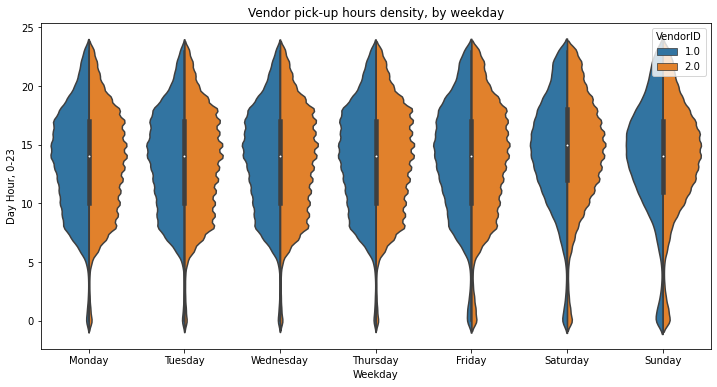

In [15]:
# vendor pick-up hours density by weekdays
plt.figure(figsize=(12,6))
sns.violinplot(x=data.dow_pickup, 
               y=data.hh_pickup, 
               hue=data.VendorID, 
               split=True)

plt.title('Vendor pick-up hours density, by weekday')
plt.xlabel('Weekday')
plt.ylabel('Day Hour, 0-23')
plt.xticks(range(0,7), dow_names, rotation='horizontal')
pass